# **\[CGSP\]** Chap 12.1: Random Graph Process

JiyunLim  
2023-07-15

# 12.1 Random Graph Process

## 12.1.1 Introduction

Most of the tools in graph signal processing are deterministic in
nature, e.g., graph signal denoising using diffusion \[1\], sampling and
reconstruction of graph signals \[2–7\], graph filter design \[8–11\],
and so on.

> 그래프 신호 처리의 대부분의 도구는 본질적으로 결정론적입니다. 예를
> 들어 확산 \[1\]을 사용한 그래프 신호 노이즈 제거, 그래프 신호 샘플링
> 및 재구성 \[2-7\], 그래프 필터 설계 \[8-11\] 등입니다.

Only recently, statistical signal processing methods tailored to graph
signals have been introduced. As we know from classical signal
processing focusing on spatiotemporal signals, statistical methods allow
one to take statistical information into account when designing optimal
sampling and reconstruction schemes, e.g., Wiener filtering for
denoising, interpolation, prediction, and so on \[12\].

> 최근에서야 그래프 신호에 맞춘 통계적 신호 처리 방법이 도입되었습니다.
> 시공간 신호에 초점을 맞춘 고전적인 신호 처리를 통해 우리가 알고
> 있듯이, 통계학적 방법을 사용하면 최적 샘플링 및 재구성 체계를 설계할
> 때 통계 정보를 고려할 수 있습니다(예: 노이즈 제거, 보간, 예측 등을
> 위한 Wiener 필터링) \[12\].

-   Wiener filtering?

This generally leads to a better average performance compared to
deterministic methods. Key to the majority of statistical methods is the
concept of weak stationarity, which means that the first- and
second-order statistics of the random process do not change over space
and/or time.

> 이는 일반적으로 결정론적 방법에 비해 더 나은 평균 성능으로 이어집니다.
> 대부분의 통계적 방법의 핵심은 약정상성의 개념이며, 이는 랜덤
> 프로세스의 1차 및 2차 통계량이 공간 및/또는 시간에 따라 변하지 않음을
> 의미합니다.

The extension of this concept to graph signals is not trivial due to the
fact that these signals have an irregular structure, which is generally
characterized by a so-called graph shift (a generalization of the shift
in time and/or space).

> 이 개념을 그래프 신호로 확장하는 것은 일반적으로 소위 그래프 이동(시간
> 및/또는 공간 이동의 일반화)으로 특징지어지는 불규칙한 구조를 가지고
> 있기 때문에 사소한 것은 아닙니다.

This is what will be discussed in the current chapter. The first works
discussing stationary graph processes observe that in contrast to a
shift in time and/or space, a graph shift is not energy preserving
\[13,14\]. Hence, these papers base their definition of a weakly
stationary graph process on a new isometric graph shift.

> 이것이 이번 장에서 논의될 내용입니다. 정상 그래프 프로세스를 논의하는
> 첫 번째 연구에서는 시공간의 변화와 달리 그래프 이동이 에너지 보존이
> 아님을 관찰했습니다 \[13,14\]. 따라서, 이 논문들은 새로운 아이소메트릭
> 그래프 이동을 기반으로 약정상 그래프 프로세스의 정의를 기반으로
> 합니다.

-   아이소메트릭 그래프?

However, this new shift cannot be carried out by means of local
operations and hence the connection between stationarity and locality is
lost. Therefore, in this chapter, we present definitions based on the
original graph shift, allowing for stationarity tests and estimation
schemes based on local information. Stationary graph processes are also
characterized by a power spectral density (PSD) and this chapter
provides a rigorous treatment of various PSD estimators, including
nonparametric and parametric methods. Our treatment of stationary graph
processes is based on the comprehensive study presented in \[15\]. Graph
stationarity was also studied in \[16\], where the analysis is carried
out using the Laplacian matrix as the graph shift operator.

> 그러나 이 새로운 이동은 local operation을 통해 수행될 수 없으므로
> 정상성과 지역성 사이의 연결이 손실됩니다. 따라서 이 장에서는 원래
> 그래프 이동을 기반으로 한 정의를 제시하여 로컬 정보를 기반으로 한
> 정상성 테스트 및 추정 체계를 허용합니다. 정상 그래프 프로세스는 또한
> 파워 스펙트럼 밀도(PSD)로 특징지어지며 이 장에서는 비모수 및
> 파라메트릭 방법을 포함한 다양한 PSD 추정기에 대한 엄격한 처리를
> 제공합니다. 정상 그래프 프로세스에 대한 내용은 \[15\]에 제시된
> 포괄적인 연구를 기반으로 합니다. 그래프 정상성은 또한 \[16\]에서
> 연구되었으며, 분석은 그래프 이동 연산자로 라플라스 행렬을 사용하여
> 수행됩니다.

In this chapter, the proposed framework is also extended to random
processes that are jointly stationary in the time and vertex domain
\[17\]. This paves the way for statistical tools for random processes
over two domains: the regular time domain and the irregular graph
domain.

> 이 장에서, 제안된 프레임워크는 또한 시간 및 정점 영역에서 공동으로
> 결합 정상 랜덤 프로세스로 확장됩니다 \[17\]. 이는 정규 시간 도메인과
> 비정규 그래프 도메인의 두 도메인에 걸친 랜덤 프로세스에 대한 통계
> 도구의 길을 열어줍니다.

The field of compressive sensing has recently been extended to
compressive covariance sensing \[18\], which is based on the idea that
the covariance matrix or PSD of a spatiotemporal process can be
estimated from compressed measurements without any prior assumptions on
sparsity or smoothness. A special case of compressive covariance sensing
occurs when the compression is realized by subsampling (below the
Nyquist rate), also known as sparse covariance sensing.

> 압축 감지 분야는 최근 압축 공분산 감지\[18\]로 확장되었으며, 이는
> 시공간 프로세스의 공분산 행렬 또는 PSD라는 아이디어에 기초합니다
> 희소성 또는 평활도에 대한 사전 가정 없이 압축 측정을 통해 추정할 수
> 있습니다. 압축 공분산 감지의 특별한 경우는 압축이 희소 공분산
> 감지라고도 하는 하위 샘플링(나이퀴스트 속도하에서)에 의해 실현될 때
> 발생합니다.

This allows one to design statistical signal processing tools from only
a subset of measurements. The last part of the chapter explains how
these ideas can be extended to random graph processes, where the
covariance matrix does not have any apparent structure, as for
spatiotemporal processes \[19\]. We demonstrate how the covariance
matrix—and thus the PSD—of a graph process can be estimated from a
subset of the nodes without the use of priors.

> 이를 통해 일부 측정치에서만 통계 신호 처리 도구를 설계할 수 있습니다.
> 이 장의 마지막 부분에서는 시공간 프로세스와 같이 공분산 행렬이 명백한
> 구조를 갖지 않는 랜덤 그래프 프로세스로 이러한 아이디어를 확장하는
> 방법을 설명합니다 \[19\]. 그래프 프로세스의 공분산 행렬, 즉 PSD가 사전
> 사용 없이 노드의 하위 집합에서 추정되는 방법을 보여줍니다.

Again, nonparametric as well as parametric methods are considered and we
additionally show how to select the nodes in a greedy fashion.

> 다시, 비모수 및 파라메트릭 방법이 고려되고 우리는 그리디 방식으로
> 노드를 선택하는 방법을 추가로 보여줍니다.

## 12.1.3 Notation

Let $\cal{G} = (\cal{N} , \cal{E})$ be a directed graph or network with
a set of $N$ nodes $\cal{N}$ and directed edges E such that
$(i, j) \in \cal{E}$ if there exists an edge from node $i$ to node $j$.
We associate with $\cal{G}$ the graph shift operator (GSO)
$\boldsymbol{S}$, defined as an $N \times N$ matrix whose entry
$\boldsymbol{S}_{j,i} = 0$ only if $i = j$ or if $(i, j) \in \cal{E}$
\[9,20\]. The sparsity pattern of $\boldsymbol{S}$ captures the local
structure of $\cal{G}$, but we make no specific assumptions on the
values of the nonzero entries of $\boldsymbol{S}$; hence the GSO can
represent the adjacency matrix, the Laplacian, or other graph-related
matrices.

In this chapter we assume that $\boldsymbol{S}$ is normal to guarantee
the existence of a unitary matrix[1]
$\mathbf{V} = [\mathbf{v}_1, \mathbf{v}_2, \dots , \mathbf{v}_N]$ and a
diagonal matrix $\mathbf{\Lambda}$ such that
$\boldsymbol{S} = \mathbf{V}\mathbf{\Lambda} \mathbf{V}^{H}$. We use
$\mathbf{x} = [\mathbf{x}_1, \dots , \mathbf{x}_N]^\top \in \mathbb{R}^n$
to denote a generic graph signal and
$\tilde{\mathbf{x}} := \mathbf{V}^{H}\mathbf{x}$ to denote its frequency
representation, with $\mathbf{V}^{H}$ being the graph Fourier transform
(GFT) \[9\]. Finally, we use
$\boldsymbol{H} : \mathbb{R}^N \to \mathbb{R}^N$ to denote a linear
shift-invariant graph filter of the form where $\tilde{\mathbf{h}}$
denotes the frequency response of the filter
$\mathbf{H}, \mathbf{\Psi_L}$ is an $N \times L$ Vandermonde matrix with
entries $\Psi_{k,l} = \lambda_k^{l-1}$, and $\mathbf{h}$ is a vector
collecting the polynomial coefficients.

The notation $\circ, \otimes$, and $\odot$ denote the elementwise,
Kronecker, and Khatri-Rao matrix products, respectively. The notation
$\oplus$ stands for the Kronecker sum.

-   $\boldsymbol{S}$ : graph shift operator (고유분해가능 //
    ${\bf S} = {\bf V}{\bf \Lambda}{\bf V}^{H}$)
-   ${\bf x} = [{\bf x_1}, {\bf x_2},\dots, {\bf x_N}]^\top$ : generic
    graph signal
-   ${\tilde{\bf x}}:= {\bf V}^{H}{\bf x}$ : frequency representation
-   ${\bf V}^H$ : graph Fourier transform (GFT)
-   ${\bf H}: {\mathbb{R}^N} \to {\mathbb{R}^N}$ : linear
    shift-invariant graph filter
-   $\tilde{h}$: frequency response of filter $\bf {H}$
-   ${\bf \Psi_L}$: $N\times L$ Vandermonde matrix with entries
    $\Psi_{k,l} = \lambda_k^{l-1}$
-   ${\bf h}$ : vector collecting the polynomial coefficients.

> **normal GSO**
>
> 즉 ${\bf S}$의 고유벡터 행렬이 존재 안할 수도 있다. 따라서 GSO
> ${\bf S}$가 고유분해가능하다는 조건이 추가적으로 필요한데 이러한
> 조건을 만족하는 GSO를 normal GSO라고 부른다.
> $${\bf S} = {\bf V}{\bf \Lambda}{\bf V}^{H}$$

$${\bf H} = \sum_{l=0}^{L-1} h_l{\bf S}^l={\bf V}\text{diag}({\tilde{\bf h}}){\bf V}^H = {\bf V}\text{diag}({\bf \Psi_L}{\bf h}){\bf V}^H$$

`-` 방데르몽드 행렬 (Vandermonde matrix)

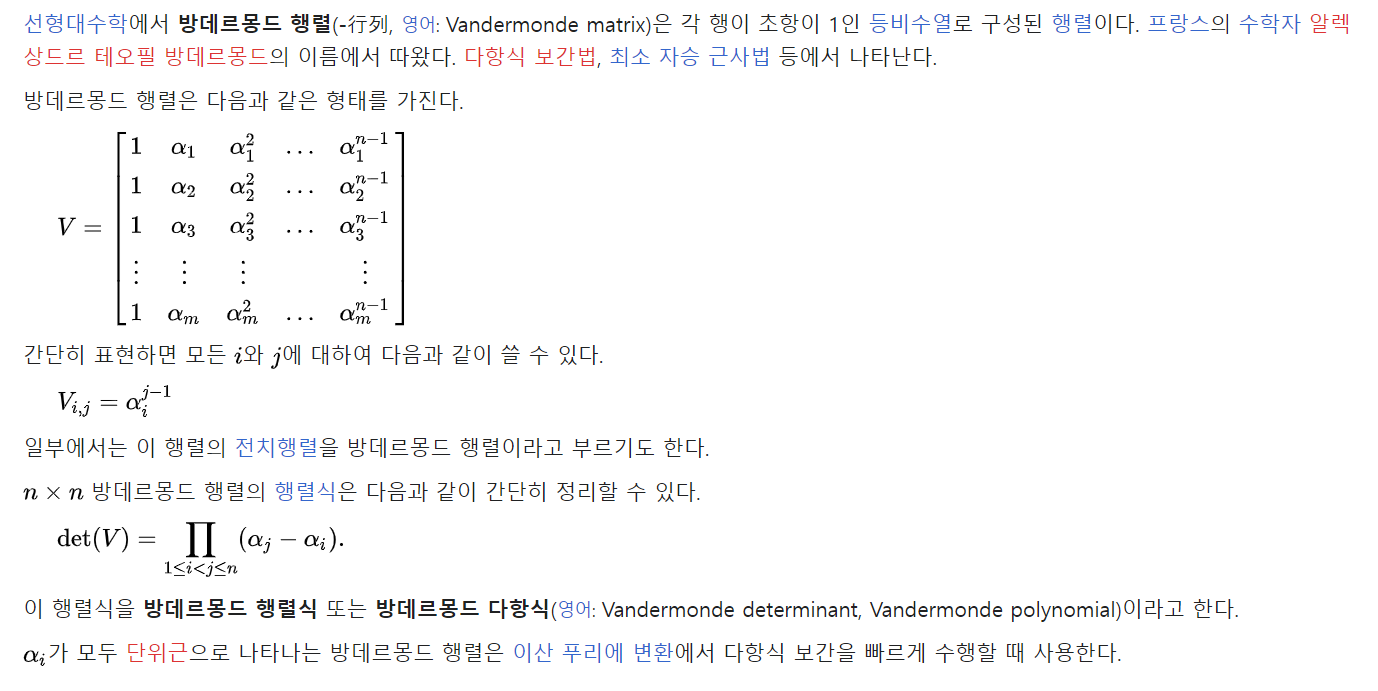

------------------------------------------------------------------------

## To read

-   Unitary Shift Operators on a Graph
    -   <https://arxiv.org/pdf/1909.05767v3.pdf>
-   On the Shift Operator, Graph Frequency, and Optimal Filtering in
    Graph Signal Processing
    -   <https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8038007>

# 12.2 WEAKLY STATIONARY GRAPH PROCESSES

We extend three equivalent definitions of weak stationarity in time to
the graph domain, the most common being the invariance of the first and
second moments to time shifts. We will see that under certain conditions
those definitions can be rendered equivalent for the graph domain as
well. Intuitively, stating that a graph process is stationary is an
inherently incomplete assertion because we need to declare which graph
we are referring to.

Hence, the proposed definitions depend on the GSO ${\bf S}$, so that a
process ${\bf x}$ can be stationary in ${\bf S}$ but not in
${\bf S}'\neq {\bf S}$.

약한 의미의 정상성 (weak stationarity)

모든 $n$개에 대해 결합확률밀도함수가 동일하다는 것을 보이는 것은
현실적으로 불가능하기 때문에 이러한 조건을 약화시켜 만든 것이
**“약정상성”**.

-   $E(Z_t) = \mu$
-   $Var(Z_t) = \sigma_z^2$
-   $E[(Z_t-\mu)(Z_{t+k}-\mu)] = \text{Cov}(Z_t, Z_{t+k})=\gamma_k$

[1] 켤레 전치가 역행렬과 같은 복소수 정사각 행렬